In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from experiments.util import load_data

from sklearn.model_selection import train_test_split

In [2]:
X_data, y_data = load_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

#### Feature Selection - Gray Scale image

In [4]:
import lodgepole.image_tools as lit

X_train_gray = lit.rgb2gray(X_train.reshape([-1, 32 * 32, 3]))
X_train_gray = X_train_gray.reshape(-1, 32, 32)

print(X_train.shape)
print(X_train_gray.shape)

(37500, 32, 32, 3)
(37500, 32, 32)


In [5]:
X_val_gray = lit.rgb2gray(X_val.reshape([-1, 32 * 32, 3]))
X_val_gray = X_val_gray.reshape(-1, 32, 32)

print(X_val.shape)
print(X_val_gray.shape)

(12500, 32, 32, 3)
(12500, 32, 32)


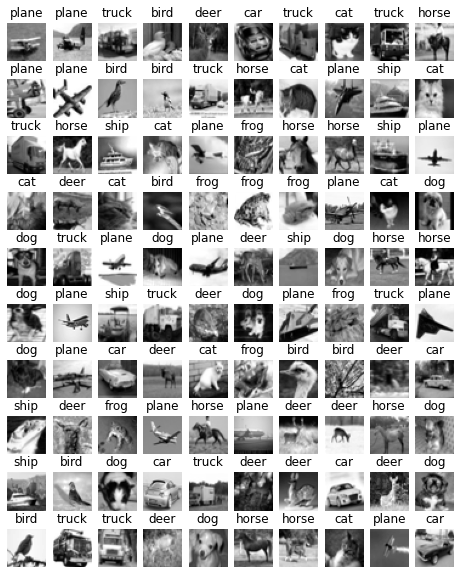

In [6]:
fig = plt.figure(figsize=(10., 10.))

grid = ImageGrid(fig, 111,
    nrows_ncols=(10, 10),
    axes_pad=(0.1, 0.25),
)

for ax, im, label in zip(grid, X_train_gray, y_train.flat):
    ax.set_title(label)
    ax.axis('off')
    ax.imshow(im, cmap='gray')

plt.show()

#### Logistc Regression

In [7]:
%%time

lr = LogisticRegression()
lr.fit(X_train_gray.reshape(-1, 32 * 32), y_train)

y_train_hat = lr.predict(X_train_gray.reshape(-1, 32 * 32))
print(accuracy_score(y_train_hat, y_train)=

y_val_hat = lr.predict(X_val_gray.reshape(-1, 32 * 32))
accuracy_score(y_val_hat, y_val)

CPU times: user 1min 31s, sys: 28.1 s, total: 2min
Wall time: 13.9 s


/Users/beni/Documents/Kennwerte/IdeaProjects/cas_machine_learning_cifar10/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()